In [3]:
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os
import pylab
from pylab import rcParams

In [4]:
df_blocking_01 = pd.read_csv('../20181209_processing_time_abi_01/result.csv', names = ('load', 'Without defragmentation', 'Conventional', 'Proposed', 'Conventional with SSR-LNO', 'Proposed with SSRR-LNO') )
df_blocking_02 = pd.read_csv('../20181209_processing_time_abi_02/result.csv', names = ('load', 'Without defragmentation', 'Conventional', 'Proposed', 'Conventional with SSR-LNO', 'Proposed with SSRR-LNO') )
df_blocking_05 = pd.read_csv('../20181209_processing_time_abi_05/result.csv', names = ('load', 'Without defragmentation', 'Conventional', 'Proposed', 'Conventional with SSR-LNO', 'Proposed with SSRR-LNO') )
df_blocking_1  = pd.read_csv('../20181209_processing_time_abi_1/result.csv',  names = ('load', 'Without defragmentation', 'Conventional', 'Proposed', 'Conventional with SSR-LNO', 'Proposed with SSRR-LNO') )

In [5]:
for index, row in df_blocking_01.iterrows():
    df_blocking_01.loc[index, 'Without defragmentation':'Proposed with SSRR-LNO'] /= [10000, 10000, 10000, 10000, 10000]
for index, row in df_blocking_02.iterrows():
    df_blocking_02.loc[index, 'Without defragmentation':'Proposed with SSRR-LNO'] /= [10000, 10000, 10000, 10000, 10000]   
for index, row in df_blocking_05.iterrows():
    df_blocking_05.loc[index, 'Without defragmentation':'Proposed with SSRR-LNO'] /= [10000, 10000, 10000, 10000, 10000]
for index, row in df_blocking_1.iterrows():
    df_blocking_1.loc[index, 'Without defragmentation':'Proposed with SSRR-LNO'] /= [10000, 10000, 10000, 10000, 10000]

In [6]:
df_blocking_01 = df_blocking_01.replace('0', np.nan)
df_blocking_02 = df_blocking_02.replace('0', np.nan)
df_blocking_05 = df_blocking_05.replace('0', np.nan)
df_blocking_1 = df_blocking_1.replace('0', np.nan)

In [7]:
df_blocking_01

,load,Without defragmentation,Conventional,Proposed,Conventional with SSR-LNO,Proposed with SSRR-LNO
0,60,0.0035,NaN,NaN,NaN,NaN
1,70,0.0149,0.0008,0.0010,NaN,NaN
2,80,0.0392,0.0061,0.0069,NaN,NaN
3,90,0.0669,0.0200,0.0204,NaN,NaN
4,100,0.0962,0.0446,0.0457,NaN,NaN
5,110,0.1255,0.0693,0.0699,NaN,NaN
6,120,0.1465,0.0953,0.0944,NaN,NaN
7,130,0.1772,0.1270,0.1273,NaN,NaN
8,140,0.1982,0.1490,0.1487,NaN,NaN
9,150,0.2247,0.1770,0.1757,NaN,NaN


In [8]:
df_blocking_05

,load,Without defragmentation,Conventional,Proposed,Conventional with SSR-LNO,Proposed with SSRR-LNO
0,60,0.0034,0.0017,0.0008,NaN,NaN
1,70,0.0153,0.0106,0.0061,NaN,NaN
2,80,0.0386,0.0304,0.0227,NaN,NaN
3,90,0.0655,0.0555,0.0457,NaN,NaN
4,100,0.0969,0.0829,0.0748,NaN,NaN
5,110,0.1238,0.1129,0.1005,NaN,NaN
6,120,0.1466,0.1341,0.1247,NaN,NaN
7,130,0.1782,0.1639,0.1543,NaN,NaN
8,140,0.1990,0.1861,0.1774,NaN,NaN
9,150,0.2232,0.2097,0.1996,NaN,NaN


In [11]:
plt.clf()
pylab.figure(figsize=(7, 7))
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.gca().yaxis.set_ticks_position('left')
plt.gca().xaxis.set_ticks_position('bottom')
plt.rcParams['font.family'] ='Times New Roman'
plt.rcParams['font.weight'] = 'light'
plt.rcParams['font.size'] = 22
plt.rcParams['axes.linewidth'] = 0.8
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['legend.borderaxespad'] = 0
plt.rcParams['legend.frameon'] = False
plt.rcParams['legend.numpoints'] = 1
plt.rcParams['legend.labelspacing'] = 0.1
plt.rcParams['savefig.bbox'] = 'tight'

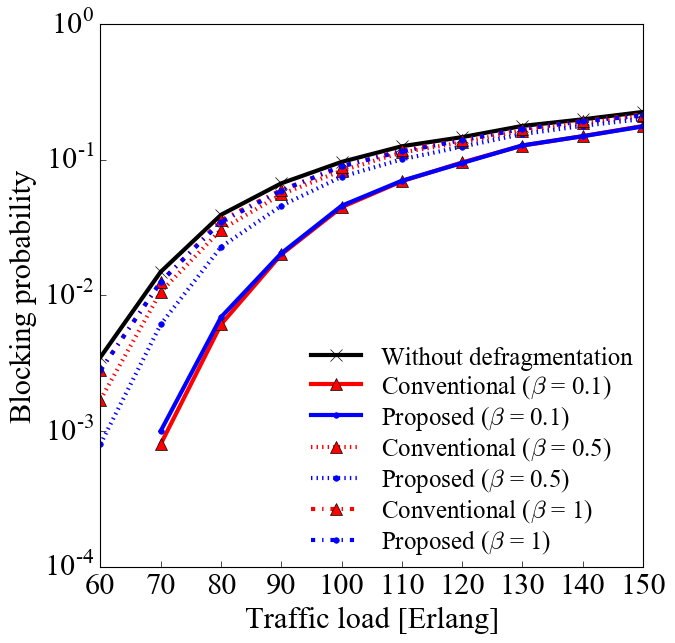

In [12]:
plt.yscale("log")
plt.minorticks_off()
plt.plot(df_blocking_01['load'], df_blocking_01['Without defragmentation'], marker='x',  color="black")

plt.plot(df_blocking_01['load'], df_blocking_01['Conventional'], label=('Conventional (' + r'$\beta$' + ' = 0.1)'), marker='^',  color="red")
plt.plot(df_blocking_01['load'], df_blocking_01['Proposed'], label=('Proposed (' + r'$\beta$' + ' = 0.1)'), marker='.',  color="blue")

plt.plot(df_blocking_05['load'], df_blocking_05['Conventional'], label=('Conventional (' + r'$\beta$' + ' = 0.5)'), marker='^',  color="red", linestyle=':')
plt.plot(df_blocking_05['load'], df_blocking_05['Proposed'], label=('Proposed (' + r'$\beta$' + ' = 0.5)'), marker='.',  color="blue", linestyle=':')

plt.plot(df_blocking_1['load'], df_blocking_1['Conventional'], label=('Conventional (' + r'$\beta$' + ' = 1)'), marker='^',  color="red", linestyle='-.')
plt.plot(df_blocking_1['load'], df_blocking_1['Proposed'], label=('Proposed (' + r'$\beta$' + ' = 1)'), marker='.',  color="blue", linestyle='-.')

# plt.xlim(50, 150)
# plt.yticks([1,0.1, 0.01,0.001, 0.0001])

plt.xlabel("Traffic load [Erlang]") # x軸のタイトル
plt.ylabel("Blocking probability") # y軸
plt.legend(loc="lower right")
plt.savefig("../../sawa_paper/sawa/20181101_journal_sawa/fig/speeding_net11.pdf")
plt.show()
plt.close()